In [1]:
# numpy and pandas for data manipulation
import numpy as np
import pandas as pd 

# sklearn preprocessing for dealing with categorical variables
from sklearn.preprocessing import LabelEncoder

# File system manangement
import os

# Suppress warnings 
import warnings
warnings.filterwarnings('ignore')

# matplotlib and seaborn for plotting
import matplotlib.pyplot as plt
import seaborn as sns


import numpy as np
import pandas as pd
import gc
import time
import re
from contextlib import contextmanager
import lightgbm as lgb
from lightgbm import LGBMClassifier
from lightgbm import early_stopping
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.model_selection import KFold, StratifiedKFold
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

from sklearn.metrics import confusion_matrix
import lightgbm as lgb
from lightgbm import LGBMClassifier
from sklearn.model_selection import StratifiedKFold, KFold
import mlflow
import gc
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import f1_score, recall_score, precision_score, accuracy_score

import mlflow
import mlflow.sklearn
import mlflow.lightgbm
warnings.simplefilter(action='ignore', category=FutureWarning)
from sklearn.utils.class_weight import compute_class_weight
import gc
import mlflow
import numpy as np
import pandas as pd
from sklearn.metrics import roc_auc_score, f1_score, recall_score, precision_score, accuracy_score
from lightgbm import LGBMClassifier
from sklearn.model_selection import StratifiedKFold, KFold

In [2]:
df=pd.read_csv('final_df.csv',index_col=0)

In [3]:
df.head(10)

,SK_ID_CURR,TARGET,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,CC_NAME_CONTRACT_STATUS_Signed_MAX,CC_NAME_CONTRACT_STATUS_Signed_MEAN,CC_NAME_CONTRACT_STATUS_Signed_SUM,CC_NAME_CONTRACT_STATUS_Signed_VAR,CC_NAME_CONTRACT_STATUS_nan_MIN,CC_NAME_CONTRACT_STATUS_nan_MAX,CC_NAME_CONTRACT_STATUS_nan_MEAN,CC_NAME_CONTRACT_STATUS_nan_SUM,CC_NAME_CONTRACT_STATUS_nan_VAR,CC_COUNT
index,,,,,,,,,,,,,,,,,,,,,
0,100002,1.0,0,0,0,0,202500.0,406597.5,24700.5,351000.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,100003,0.0,1,0,1,0,270000.0,1293502.5,35698.5,1129500.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,100004,0.0,0,1,0,0,67500.0,135000.0,6750.0,135000.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,100006,0.0,1,0,0,0,135000.0,312682.5,29686.5,297000.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.0
4,100007,0.0,0,0,0,0,121500.0,513000.0,21865.5,513000.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,100008,0.0,0,0,0,0,99000.0,490495.5,27517.5,454500.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,100009,0.0,1,1,0,1,171000.0,1560726.0,41301.0,1395000.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,100010,0.0,0,1,0,0,360000.0,1530000.0,42075.0,1530000.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,100011,0.0,1,0,0,0,112500.0,1019610.0,33826.5,913500.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,74.0


# chi2 test for category

In [4]:
df.describe()

,SK_ID_CURR,TARGET,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,CC_NAME_CONTRACT_STATUS_Signed_MAX,CC_NAME_CONTRACT_STATUS_Signed_MEAN,CC_NAME_CONTRACT_STATUS_Signed_SUM,CC_NAME_CONTRACT_STATUS_Signed_VAR,CC_NAME_CONTRACT_STATUS_nan_MIN,CC_NAME_CONTRACT_STATUS_nan_MAX,CC_NAME_CONTRACT_STATUS_nan_MEAN,CC_NAME_CONTRACT_STATUS_nan_SUM,CC_NAME_CONTRACT_STATUS_nan_VAR,CC_COUNT
count,356251.000000,307507.00000,356251.000000,356251.000000,356251.000000,356251.000000,3.562510e+05,3.562510e+05,356215.000000,3.559730e+05,...,103558.000000,103558.000000,103558.000000,102866.000000,103558.0,103558.0,103558.0,103558.0,102866.0,103558.000000
mean,278128.870078,0.08073,0.660001,0.339699,0.306764,0.414312,1.701159e+05,5.877695e+05,27425.644390,5.280212e+05,...,0.047597,0.003583,0.106781,0.002955,0.0,0.0,0.0,0.0,0.0,37.083683
std,102842.068890,0.27242,0.473709,0.473608,0.461151,0.720376,2.235080e+05,3.986253e+05,14732.860946,3.660657e+05,...,0.212912,0.031014,1.272522,0.019938,0.0,0.0,0.0,0.0,0.0,33.483627
min,100001.000000,0.00000,0.000000,0.000000,0.000000,0.000000,2.565000e+04,4.500000e+04,1615.500000,4.050000e+04,...,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,1.000000
25%,189065.500000,0.00000,0.000000,0.000000,0.000000,0.000000,1.125000e+05,2.700000e+05,16731.000000,2.340000e+05,...,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,10.000000
50%,278129.000000,0.00000,1.000000,0.000000,0.000000,0.000000,1.530000e+05,5.002110e+05,25078.500000,4.500000e+05,...,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,22.000000
75%,367192.500000,0.00000,1.000000,1.000000,1.000000,1.000000,2.025000e+05,7.975575e+05,34960.500000,6.750000e+05,...,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,75.000000
max,456255.000000,1.00000,1.000000,1.000000,1.000000,20.000000,1.170000e+08,4.050000e+06,258025.500000,4.050000e+06,...,1.000000,1.000000,62.000000,0.500000,0.0,0.0,0.0,0.0,0.0,192.000000


In [5]:
binary_columns = df.columns[df.nunique() == 2]  # nunique() == 2 means columns must have two unique values

# Filter DataFrame to keep only those columns
binary_df = df[binary_columns]
binary_df

,TARGET,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,...,CC_NAME_CONTRACT_STATUS_Completed_MIN,CC_NAME_CONTRACT_STATUS_Completed_MAX,CC_NAME_CONTRACT_STATUS_Demand_MIN,CC_NAME_CONTRACT_STATUS_Demand_MAX,CC_NAME_CONTRACT_STATUS_Refused_MAX,CC_NAME_CONTRACT_STATUS_Refused_SUM,CC_NAME_CONTRACT_STATUS_Sentproposal_MAX,CC_NAME_CONTRACT_STATUS_Sentproposal_SUM,CC_NAME_CONTRACT_STATUS_Signed_MIN,CC_NAME_CONTRACT_STATUS_Signed_MAX
index,,,,,,,,,,,,,,,,,,,,,
0,1.0,0,0,0,1,1,0,1,1,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0.0,1,0,1,1,1,0,1,1,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0.0,0,1,0,1,1,1,1,1,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0.0,1,0,0,1,1,0,1,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0,0,0,1,1,0,1,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48739,NaN,1,0,0,1,1,1,1,1,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
48740,NaN,1,0,1,1,1,0,1,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
48741,NaN,1,1,0,1,1,0,1,1,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
completion=df.isna().mean() * 100
completion.sort_values(ascending=False)
completion=pd.DataFrame(completion,columns=['percent'])

In [7]:
miss_50=completion[completion['percent']>50]
miss_50.index

Index(['OWN_CAR_AGE', 'EXT_SOURCE_1', 'APARTMENTS_AVG', 'BASEMENTAREA_AVG',
       'YEARS_BUILD_AVG', 'COMMONAREA_AVG', 'ELEVATORS_AVG', 'ENTRANCES_AVG',
       'FLOORSMIN_AVG', 'LANDAREA_AVG',
       ...
       'CC_NAME_CONTRACT_STATUS_Signed_MAX',
       'CC_NAME_CONTRACT_STATUS_Signed_MEAN',
       'CC_NAME_CONTRACT_STATUS_Signed_SUM',
       'CC_NAME_CONTRACT_STATUS_Signed_VAR', 'CC_NAME_CONTRACT_STATUS_nan_MIN',
       'CC_NAME_CONTRACT_STATUS_nan_MAX', 'CC_NAME_CONTRACT_STATUS_nan_MEAN',
       'CC_NAME_CONTRACT_STATUS_nan_SUM', 'CC_NAME_CONTRACT_STATUS_nan_VAR',
       'CC_COUNT'],
      dtype='object', length=233)

In [8]:
df['OWN_CAR_AGE']

index
0         NaN
1         NaN
2        26.0
3         NaN
4         NaN
         ... 
48739     NaN
48740     NaN
48741     4.0
48742     NaN
48743    22.0
Name: OWN_CAR_AGE, Length: 356251, dtype: float64

In [9]:
df.drop(columns=miss_50.index,inplace=True)
df.shape

(356251, 564)

# data imbalanced

## class weight

In [10]:
def kfold_lightgbm(df, num_folds, stratified=False, debug=False):
    # Define your parameters and log them with MLflow
    lgb_params = {
        'nthread': 4,
        'n_estimators': 10000,
        'learning_rate': 0.02,
        'num_leaves': 34,
        'colsample_bytree': 0.9497036,
        'subsample': 0.8715623,
        'max_depth': 8,
        'reg_alpha': 0.041545473,
        'reg_lambda': 0.0735294,
        'min_split_gain': 0.0222415,
        'min_child_weight': 39.3259775
    }

    # Log all parameters to MLflow
    for param, value in lgb_params.items():
        mlflow.log_param(param, value)

    train_df = df[df['TARGET'].notnull()]
    test_df = df[df['TARGET'].isnull()]
    print(f"Starting LightGBM. Train shape: {train_df.shape}, test shape: {test_df.shape}")

    del df
    gc.collect()

    if stratified:
        folds = StratifiedKFold(n_splits=num_folds, shuffle=True, random_state=1001)
    else:
        folds = KFold(n_splits=num_folds, shuffle=True, random_state=1001)

    oof_preds = np.zeros(train_df.shape[0])
    sub_preds = np.zeros(test_df.shape[0])
    feature_importance_df = pd.DataFrame()

    feats = [f for f in train_df.columns if f not in ['TARGET', 'SK_ID_CURR', 'SK_ID_BUREAU', 'SK_ID_PREV', 'index']]

    # Compute class weights
    class_weights = compute_class_weight(
        class_weight='balanced',
        classes=np.unique(train_df['TARGET']),
        y=train_df['TARGET']
    )
    class_weights_dict = {i: class_weights[i] for i in range(len(class_weights))}

    for n_fold, (train_idx, valid_idx) in enumerate(folds.split(train_df[feats], train_df['TARGET'])):
        print(f"Fold {n_fold + 1}")

        train_x, train_y = train_df[feats].iloc[train_idx], train_df['TARGET'].iloc[train_idx]
        valid_x, valid_y = train_df[feats].iloc[valid_idx], train_df['TARGET'].iloc[valid_idx]

        # Set sample_weight to balance classes during training
        sample_weight = train_y.map(class_weights_dict)

        clf = LGBMClassifier(**lgb_params)
        clf.fit(train_x, train_y,
                sample_weight=sample_weight,  # Add class weights
                eval_set=[(train_x, train_y), (valid_x, valid_y)],
                eval_metric='auc',
                callbacks=[lgb.early_stopping(stopping_rounds=10, verbose=200)])

        oof_preds[valid_idx] = clf.predict_proba(valid_x, num_iteration=clf.best_iteration_)[:, 1]
        sub_preds += clf.predict_proba(test_df[feats], num_iteration=clf.best_iteration_)[:, 1] / folds.n_splits

        fold_importance_df = pd.DataFrame()
        fold_importance_df["feature"] = feats
        fold_importance_df["importance"] = clf.feature_importances_
        fold_importance_df["fold"] = n_fold + 1
        feature_importance_df = pd.concat([feature_importance_df, fold_importance_df], axis=0)

        # Calculate and print metrics
        fold_auc = roc_auc_score(valid_y, oof_preds[valid_idx])
        fold_f1 = f1_score(valid_y, (oof_preds[valid_idx] > 0.5).astype(int))
        fold_recall = recall_score(valid_y, (oof_preds[valid_idx] > 0.5).astype(int))
        fold_precision = precision_score(valid_y, (oof_preds[valid_idx] > 0.5).astype(int))
        
        # Calculate custom cost
        fold_custom_cost = custom_cost_metric(valid_y, oof_preds[valid_idx])
        
        print(f'Fold {n_fold + 1} AUC: {fold_auc:.6f}')
        print(f'Fold {n_fold + 1} F1 Score: {fold_f1:.6f}')
        print(f'Fold {n_fold + 1} Recall: {fold_recall:.6f}')
        print(f'Fold {n_fold + 1} Precision: {fold_precision:.6f}')
        print(f'Fold {n_fold + 1} Custom Cost: {fold_custom_cost:.6f}')

        # Log metrics to MLflow
        mlflow.log_metric(f'fold_{n_fold + 1}_auc', fold_auc)
        mlflow.log_metric(f'fold_{n_fold + 1}_f1', fold_f1)
        mlflow.log_metric(f'fold_{n_fold + 1}_recall', fold_recall)
        mlflow.log_metric(f'fold_{n_fold + 1}_precision', fold_precision)
        mlflow.log_metric(f'fold_{n_fold + 1}_custom_cost', fold_custom_cost)

        # Log the model for the current fold
        mlflow.lightgbm.log_model(clf, f'model_fold_{n_fold + 1}')

        del clf, train_x, train_y, valid_x, valid_y
        gc.collect()

    # Calculate and log overall metrics
    full_auc = roc_auc_score(train_df['TARGET'], oof_preds)
    full_accuracy = accuracy_score(train_df['TARGET'], (oof_preds > 0.5).astype(int))
    full_f1 = f1_score(train_df['TARGET'], (oof_preds > 0.5).astype(int))
    full_recall = recall_score(train_df['TARGET'], (oof_preds > 0.5).astype(int))
    full_precision = precision_score(train_df['TARGET'], (oof_preds > 0.5).astype(int))
    full_custom_cost = custom_cost_metric(train_df['TARGET'], oof_preds)
    
    print(f'Full AUC score: {full_auc:.6f}')
    print(f'Full F1 Score: {full_f1:.6f}')
    print(f'Full Recall: {full_recall:.6f}')
    print(f'Full Precision: {full_precision:.6f}')
    print(f'Full Custom Cost: {full_custom_cost:.6f}')

    # Log the full metrics to MLflow
    mlflow.log_metric('full_auc', full_auc)
    mlflow.log_metric('full_accuracy', full_auc)
    mlflow.log_metric('full_f1', full_f1)
    mlflow.log_metric('full_recall', full_recall)
    mlflow.log_metric('full_precision', full_precision)
    mlflow.log_metric('full_custom_cost', full_custom_cost)

    # Log feature importance plot as an artifact
    display_importances(feature_importance_df)
    mlflow.log_artifact('lgbm_importances01.png')

    if not debug:
        test_df['TARGET'] = sub_preds
        submission_file_name = 'submission.csv'
        test_df[['SK_ID_CURR', 'TARGET']].to_csv(submission_file_name, index=False)
        print(f'Submission file saved as {submission_file_name}')
        
def custom_cost_metric(y_true, y_pred, fn_cost=10, fp_cost=1):
    """
    Custom metric that calculates the total cost based on false negatives (FN) and false positives (FP).
    
    Parameters:
    - y_true: Array of true binary labels
    - y_pred: Array of predicted probabilities
    - fn_cost: Cost associated with false negatives
    - fp_cost: Cost associated with false positives

    Returns:
    - total_cost: The computed cost
    """
    y_pred_binary = (y_pred > 0.5).astype(int)
    tn, fp, fn, tp = confusion_matrix(y_true, y_pred_binary).ravel()
    total_cost = fn * fn_cost + fp * fp_cost
    return total_cost

def display_importances(feature_importance_df):
    """
    Function to display and save the feature importance plot.
    It assumes that feature importance data is passed as a DataFrame.
    """
    cols = (feature_importance_df[["feature", "importance"]]
            .groupby("feature")
            .mean()
            .sort_values(by="importance", ascending=False)[:40].index)

    best_features = feature_importance_df.loc[feature_importance_df.feature.isin(cols)]
    plt.figure(figsize=(10, 10))
    sns.barplot(x="importance", y="feature", data=best_features.sort_values(by="importance", ascending=False))
    plt.title('LightGBM Features (avg over folds)')
    plt.tight_layout()
    plt.savefig('lgbm_importances01.png')


In [11]:
# mlflow.set_tracking_uri("http://127.0.0.1:5000")
# mlflow.end_run()
# with mlflow.start_run(run_name="LightGBM sklearnclass_weight"):
#     # Add experiment name and tags
#     mlflow.set_tag("developer", "Elise")
#     mlflow.set_tag("experiment", "LightGBM_kfold_3")
    
#     feat_importance = kfold_lightgbm(df, num_folds= 3, stratified= False, debug= False)

## SMOTE and random under sampling

In [12]:
train=df[df['TARGET'].notnull()]
test=df[df['TARGET'].isnull()]


In [13]:
col=train.columns
test=test[col]

In [14]:
columns_with_nan=train.isnull().any()
nan_columns = columns_with_nan[columns_with_nan].index.tolist()
nan_columns

['AMT_ANNUITY',
 'AMT_GOODS_PRICE',
 'DAYS_EMPLOYED',
 'CNT_FAM_MEMBERS',
 'EXT_SOURCE_2',
 'EXT_SOURCE_3',
 'YEARS_BEGINEXPLUATATION_AVG',
 'FLOORSMAX_AVG',
 'LIVINGAREA_AVG',
 'YEARS_BEGINEXPLUATATION_MODE',
 'FLOORSMAX_MODE',
 'LIVINGAREA_MODE',
 'YEARS_BEGINEXPLUATATION_MEDI',
 'FLOORSMAX_MEDI',
 'LIVINGAREA_MEDI',
 'TOTALAREA_MODE',
 'OBS_30_CNT_SOCIAL_CIRCLE',
 'DEF_30_CNT_SOCIAL_CIRCLE',
 'OBS_60_CNT_SOCIAL_CIRCLE',
 'DEF_60_CNT_SOCIAL_CIRCLE',
 'DAYS_LAST_PHONE_CHANGE',
 'AMT_REQ_CREDIT_BUREAU_HOUR',
 'AMT_REQ_CREDIT_BUREAU_DAY',
 'AMT_REQ_CREDIT_BUREAU_WEEK',
 'AMT_REQ_CREDIT_BUREAU_MON',
 'AMT_REQ_CREDIT_BUREAU_QRT',
 'AMT_REQ_CREDIT_BUREAU_YEAR',
 'DAYS_EMPLOYED_PERC',
 'INCOME_PER_PERSON',
 'ANNUITY_INCOME_PERC',
 'PAYMENT_RATE',
 'BURO_DAYS_CREDIT_MIN',
 'BURO_DAYS_CREDIT_MAX',
 'BURO_DAYS_CREDIT_MEAN',
 'BURO_DAYS_CREDIT_VAR',
 'BURO_DAYS_CREDIT_ENDDATE_MIN',
 'BURO_DAYS_CREDIT_ENDDATE_MAX',
 'BURO_DAYS_CREDIT_ENDDATE_MEAN',
 'BURO_DAYS_CREDIT_UPDATE_MEAN',
 'BURO_CREDIT_

In [15]:
train.dropna(axis=1, inplace=True)
train

,SK_ID_CURR,TARGET,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,REGION_POPULATION_RELATIVE,DAYS_BIRTH,...,WALLSMATERIAL_MODE_Block,WALLSMATERIAL_MODE_Mixed,WALLSMATERIAL_MODE_Monolithic,WALLSMATERIAL_MODE_Others,WALLSMATERIAL_MODE_Panel,WALLSMATERIAL_MODE_Stonebrick,WALLSMATERIAL_MODE_Wooden,EMERGENCYSTATE_MODE_No,EMERGENCYSTATE_MODE_Yes,INCOME_CREDIT_PERC
index,,,,,,,,,,,,,,,,,,,,,
0,100002,1.0,0,0,0,0,202500.0,406597.5,0.018801,-9461,...,0,0,0,0,0,1,0,1,0,0.498036
1,100003,0.0,1,0,1,0,270000.0,1293502.5,0.003541,-16765,...,1,0,0,0,0,0,0,1,0,0.208736
2,100004,0.0,0,1,0,0,67500.0,135000.0,0.010032,-19046,...,0,0,0,0,0,0,0,0,0,0.500000
3,100006,0.0,1,0,0,0,135000.0,312682.5,0.008019,-19005,...,0,0,0,0,0,0,0,0,0,0.431748
4,100007,0.0,0,0,0,0,121500.0,513000.0,0.028663,-19932,...,0,0,0,0,0,0,0,0,0,0.236842
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307506,456251,0.0,0,0,1,0,157500.0,254700.0,0.032561,-9327,...,0,0,0,0,0,1,0,1,0,0.618375
307507,456252,0.0,1,0,0,0,72000.0,269550.0,0.025164,-20775,...,0,0,0,0,0,1,0,1,0,0.267112
307508,456253,0.0,1,0,0,0,153000.0,677664.0,0.005002,-14966,...,0,0,0,0,1,0,0,1,0,0.225776


In [16]:
train_df=train
test_df=test

In [17]:
from imblearn.over_sampling import SMOTE
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import StratifiedKFold, KFold
from lightgbm import LGBMClassifier
import numpy as np
import pandas as pd
import mlflow
import gc
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import roc_auc_score, f1_score, recall_score, precision_score, accuracy_score
        
def custom_cost_metric(y_true, y_pred, fn_cost=10, fp_cost=1):
    """
    Custom metric that calculates the total cost based on false negatives (FN) and false positives (FP).
    
    Parameters:
    - y_true: Array of true binary labels
    - y_pred: Array of predicted probabilities
    - fn_cost: Cost associated with false negatives
    - fp_cost: Cost associated with false positives

    Returns:
    - total_cost: The computed cost
    """
    y_pred_binary = (y_pred > 0.5).astype(int)
    tn, fp, fn, tp = confusion_matrix(y_true, y_pred_binary).ravel()
    total_cost = fn * fn_cost + fp * fp_cost
    return total_cost

def display_importances(feature_importance_df):
    """
    Function to display and save the feature importance plot.
    It assumes that feature importance data is passed as a DataFrame.
    """
    cols = (feature_importance_df[["feature", "importance"]]
            .groupby("feature")
            .mean()
            .sort_values(by="importance", ascending=False)[:40].index)

    best_features = feature_importance_df.loc[feature_importance_df.feature.isin(cols)]
    plt.figure(figsize=(10, 10))
    sns.barplot(x="importance", y="feature", data=best_features.sort_values(by="importance", ascending=False))
    plt.title('LightGBM Features (avg over folds)')
    plt.tight_layout()
    plt.savefig('lgbm_importances01.png')


In [18]:
from imblearn.under_sampling import RandomUnderSampler

def kfold_lightgbm(df, num_folds, stratified=False, debug=False):
    # Define your parameters and log them with MLflow
    lgb_params = {
        'nthread': 4,
        'n_estimators': 10000,
        'learning_rate': 0.02,
        'num_leaves': 34,
        'colsample_bytree': 0.9497036,
        'subsample': 0.8715623,
        'max_depth': 8,
        'reg_alpha': 0.041545473,
        'reg_lambda': 0.0735294,
        'min_split_gain': 0.0222415,
        'min_child_weight': 39.3259775
    }

    # Log all parameters to MLflow
    for param, value in lgb_params.items():
        mlflow.log_param(param, value)

    # train_df = df[df['TARGET'].notnull()]
    # test_df = df[df['TARGET'].isnull()]
    print(f"Starting LightGBM. Train shape: {train_df.shape}, test shape: {test_df.shape}")

    del df
    gc.collect()

    if stratified:
        folds = StratifiedKFold(n_splits=num_folds, shuffle=True, random_state=1001)
    else:
        folds = KFold(n_splits=num_folds, shuffle=True, random_state=1001)

    oof_preds = np.zeros(train_df.shape[0])
    sub_preds = np.zeros(test_df.shape[0])
    feature_importance_df = pd.DataFrame()

    feats = [f for f in train_df.columns if f not in ['TARGET', 'SK_ID_CURR', 'SK_ID_BUREAU', 'SK_ID_PREV', 'index']]

    # smote = SMOTE(random_state=42)  # Initialize SMOTE
    rus = RandomUnderSampler(random_state=42)  # Initialize RandomUnderSampler

    for n_fold, (train_idx, valid_idx) in enumerate(folds.split(train_df[feats], train_df['TARGET'])):
        print(f"Fold {n_fold + 1}")
        
        train_x, train_y = train_df[feats].iloc[train_idx], train_df['TARGET'].iloc[train_idx]
        valid_x, valid_y = train_df[feats].iloc[valid_idx], train_df['TARGET'].iloc[valid_idx]

        # Count the number of samples in each class
        n_minority = np.sum(train_y == 1)
        n_majority = np.sum(train_y == 0)

        # Define SMOTE with a 25% increase in the minority class
        print(len(train_x),len(train_y))
        smote_strategy = (n_minority + 0.5 * n_minority) / n_majority
        smote = SMOTE(sampling_strategy=smote_strategy, random_state=42)
        train_x_res, train_y_res = smote.fit_resample(train_x, train_y)
        print("after SMOTE",len(train_x_res),len(train_y_res))       

        
        # Apply Random Under Sampling after SMOTE
        train_x_res, train_y_res = rus.fit_resample(train_x_res, train_y_res)
        print("after RUS", len(train_x_res),len(train_y_res))

        clf = LGBMClassifier(**lgb_params)
        clf.fit(train_x_res, train_y_res,
                eval_set=[(train_x_res, train_y_res), (valid_x, valid_y)],
                eval_metric='auc',
                callbacks=[lgb.early_stopping(stopping_rounds=10, verbose=200)])

        oof_preds[valid_idx] = clf.predict_proba(valid_x, num_iteration=clf.best_iteration_)[:, 1]
        sub_preds += clf.predict_proba(test_df[feats], num_iteration=clf.best_iteration_)[:, 1] / folds.n_splits

        fold_importance_df = pd.DataFrame()
        fold_importance_df["feature"] = feats
        fold_importance_df["importance"] = clf.feature_importances_
        fold_importance_df["fold"] = n_fold + 1
        feature_importance_df = pd.concat([feature_importance_df, fold_importance_df], axis=0)

        # Calculate and print metrics
        fold_auc = roc_auc_score(valid_y, oof_preds[valid_idx])
        fold_f1 = f1_score(valid_y, (oof_preds[valid_idx] > 0.5).astype(int))
        fold_recall = recall_score(valid_y, (oof_preds[valid_idx] > 0.5).astype(int))
        fold_precision = precision_score(valid_y, (oof_preds[valid_idx] > 0.5).astype(int))
        
        # Calculate custom cost
        fold_custom_cost = custom_cost_metric(valid_y, oof_preds[valid_idx])
        
        print(f'Fold {n_fold + 1} AUC: {fold_auc:.6f}')
        print(f'Fold {n_fold + 1} F1 Score: {fold_f1:.6f}')
        print(f'Fold {n_fold + 1} Recall: {fold_recall:.6f}')
        print(f'Fold {n_fold + 1} Precision: {fold_precision:.6f}')
        print(f'Fold {n_fold + 1} Custom Cost: {fold_custom_cost:.6f}')

        # Log metrics to MLflow
        mlflow.log_metric(f'fold_{n_fold + 1}_auc', fold_auc)
        mlflow.log_metric(f'fold_{n_fold + 1}_f1', fold_f1)
        mlflow.log_metric(f'fold_{n_fold + 1}_recall', fold_recall)
        mlflow.log_metric(f'fold_{n_fold + 1}_precision', fold_precision)
        mlflow.log_metric(f'fold_{n_fold + 1}_custom_cost', fold_custom_cost)

        # Log the model for the current fold
        mlflow.lightgbm.log_model(clf, f'model_fold_{n_fold + 1}')

        del clf, train_x_res, train_y_res, valid_x, valid_y
        gc.collect()

    # Calculate and log overall metrics
    full_auc = roc_auc_score(train_df['TARGET'], oof_preds)
    full_accuracy = accuracy_score(train_df['TARGET'], (oof_preds > 0.5).astype(int))
    full_f1 = f1_score(train_df['TARGET'], (oof_preds > 0.5).astype(int))
    full_recall = recall_score(train_df['TARGET'], (oof_preds > 0.5).astype(int))
    full_precision = precision_score(train_df['TARGET'], (oof_preds > 0.5).astype(int))
    full_custom_cost = custom_cost_metric(train_df['TARGET'], oof_preds)
    
    print(f'Full AUC score: {full_auc:.6f}')
    print(f'Full F1 Score: {full_f1:.6f}')
    print(f'Full Recall: {full_recall:.6f}')
    print(f'Full Precision: {full_precision:.6f}')
    print(f'Full Custom Cost: {full_custom_cost:.6f}')

    # Log the full metrics to MLflow
    mlflow.log_metric('full_auc', full_auc)
    mlflow.log_metric('full_accuracy', full_auc)
    mlflow.log_metric('full_f1', full_f1)
    mlflow.log_metric('full_recall', full_recall)
    mlflow.log_metric('full_precision', full_precision)
    mlflow.log_metric('full_custom_cost', full_custom_cost)

    # Log feature importance plot as an artifact
    display_importances(feature_importance_df)
    mlflow.log_artifact('lgbm_importances01.png')

    # if not debug:
    #     # test_df['TARGET'] = sub_preds
    #     # submission_file_name = 'submission.csv'
    #     # test_df[['SK_ID_CURR', 'TARGET']].to_csv(submission_file_name, index=False)
    #     # print(f'Submission file saved as {submission_file_name}')


In [19]:
# from mlflow.tracking import MlflowClient
# name="LightGBM with SMOTE and RUS"
# description="LightGBM model trained with SMOTE and RandomUnderSampler, using 3-fold cross-validation."


# mlflow.set_tracking_uri("http://127.0.0.1:5000")
# mlflow.end_run()
# with mlflow.start_run(run_name=name):
#     # Add experiment name and tags
#     mlflow.set_tag("developer", "Elise")
#     mlflow.set_tag("experiment", "LightGBM_kfold_3")
    
#     feat_importance = kfold_lightgbm(df, num_folds= 3, stratified= False, debug= True)
    
#     model_uri = f"runs:/{mlflow.active_run().info.run_id}/model"
#     model_version = mlflow.register_model(model_uri, name)
#     client = MlflowClient()
    
#     client.update_model_version(
#         name=name,
#         version=model_version.version,
#         description=description
#     )

# class_weight lightgbm

In [34]:
def kfold_lightgbm(df, num_folds, stratified = False, debug= False):
    train_df = df[df['TARGET'].notnull()]
    test_df = df[df['TARGET'].isnull()]
    print("Starting LightGBM. Train shape: {}, test shape: {}".format(train_df.shape, test_df.shape))
    del df
    gc.collect()
    # Cross validation model
    if stratified:
        folds = StratifiedKFold(n_splits= num_folds, shuffle=True, random_state=1001)
    else:
        folds = KFold(n_splits= num_folds, shuffle=True, random_state=1001)
    # Create arrays and dataframes to store results
    oof_preds = np.zeros(train_df.shape[0])
    sub_preds = np.zeros(test_df.shape[0])
    feature_importance_df = pd.DataFrame()
    feats = [f for f in train_df.columns if f not in ['TARGET','SK_ID_CURR','SK_ID_BUREAU','SK_ID_PREV','index']]
    for n_fold, (train_idx, valid_idx) in enumerate(folds.split(train_df[feats], train_df['TARGET'])):
        train_x, train_y = train_df[feats].iloc[train_idx], train_df['TARGET'].iloc[train_idx]
        valid_x, valid_y = train_df[feats].iloc[valid_idx], train_df['TARGET'].iloc[valid_idx]
        # LightGBM parameters found by Bayesian optimization
        clf = LGBMClassifier(
            nthread=4,
            n_estimators=10000,
            learning_rate=0.02,
            num_leaves=34,
            colsample_bytree=0.9497036,
            subsample=0.8715623,
            max_depth=8,
            reg_alpha=0.041545473,
            reg_lambda=0.0735294,
            min_split_gain=0.0222415,
            min_child_weight=39.3259775,
            silent=-1,
            verbose=-1 )
        clf.fit(train_x, train_y, eval_set=[(train_x, train_y), (valid_x, valid_y)], 
            eval_metric= 'auc', 
            callbacks=[lgb.early_stopping(stopping_rounds=10, verbose=200)])
        oof_preds[valid_idx] = clf.predict_proba(valid_x, num_iteration=clf.best_iteration_)[:, 1]
        sub_preds += clf.predict_proba(test_df[feats], num_iteration=clf.best_iteration_)[:, 1] / folds.n_splits
        fold_importance_df = pd.DataFrame()
        fold_importance_df["feature"] = feats
        fold_importance_df["importance"] = clf.feature_importances_
        fold_importance_df["fold"] = n_fold + 1
        feature_importance_df = pd.concat([feature_importance_df, fold_importance_df], axis=0)
        print('Fold %2d AUC : %.6f' % (n_fold + 1, roc_auc_score(valid_y, oof_preds[valid_idx])))
        del clf, train_x, train_y, valid_x, valid_y
        gc.collect()

    print('Full AUC score %.6f' % roc_auc_score(train_df['TARGET'], oof_preds))
    # Write submission file and plot feature importance
    if not debug:
        test_df['TARGET'] = sub_preds
        test_df[['SK_ID_CURR', 'TARGET']].to_csv(submission_file_name, index= False)
    display_importances(feature_importance_df)
    return feature_importance_df

# Display/plot feature importance
def display_importances(feature_importance_df_):
    cols = feature_importance_df_[["feature", "importance"]].groupby("feature").mean().sort_values(by="importance", ascending=False)[:40].index
    best_features = feature_importance_df_.loc[feature_importance_df_.feature.isin(cols)]
    plt.figure(figsize=(8, 10))
    sns.barplot(x="importance", y="feature", data=best_features.sort_values(by="importance", ascending=False))
    plt.title('LightGBM Features (avg over folds)')
    plt.tight_layout()
    plt.savefig('lgbm_importances01.png')

In [35]:
# from imblearn.over_sampling import SMOTE
# from sklearn.metrics import confusion_matrix
# from sklearn.model_selection import StratifiedKFold, KFold
# from lightgbm import LGBMClassifier
# import numpy as np
# import pandas as pd
# import mlflow
# import gc
# import matplotlib.pyplot as plt
# import seaborn as sns
# from sklearn.metrics import roc_auc_score, f1_score, recall_score, precision_score, accuracy_score
        
# def custom_cost_metric(y_true, y_pred, fn_cost=10, fp_cost=1):
#     """
#     Custom metric that calculates the total cost based on false negatives (FN) and false positives (FP).
    
#     Parameters:
#     - y_true: Array of true binary labels
#     - y_pred: Array of predicted probabilities
#     - fn_cost: Cost associated with false negatives
#     - fp_cost: Cost associated with false positives

#     Returns:
#     - total_cost: The computed cost
#     """
#     y_pred_binary = (y_pred > 0.5).astype(int)
#     tn, fp, fn, tp = confusion_matrix(y_true, y_pred_binary).ravel()
#     total_cost = fn * fn_cost + fp * fp_cost
#     return total_cost

# def display_importances(feature_importance_df):
#     """
#     Function to display and save the feature importance plot.
#     It assumes that feature importance data is passed as a DataFrame.
#     """
#     cols = (feature_importance_df[["feature", "importance"]]
#             .groupby("feature")
#             .mean()
#             .sort_values(by="importance", ascending=False)[:40].index)

#     best_features = feature_importance_df.loc[feature_importance_df.feature.isin(cols)]
#     plt.figure(figsize=(10, 10))
#     sns.barplot(x="importance", y="feature", data=best_features.sort_values(by="importance", ascending=False))
#     plt.title('LightGBM Features (avg over folds)')
#     plt.tight_layout()
#     plt.savefig('lgbm_importances01.png')


In [36]:
# def kfold_lightgbm(df, num_folds, stratified=False, debug=False):
#     # Define your parameters and log them with MLflow
#     lgb_params = {
#         'objective': 'binary',
#         'nthread': 4,
#         'n_estimators': 10000,
#         'learning_rate': 0.02,
#         'num_leaves': 25,
#         'colsample_bytree': 0.9497036,
#         'subsample': 0.8715623,
#         'max_depth': 8,
#         'reg_alpha': 0.041545473,
#         'reg_lambda': 0.0735294,
#         'min_split_gain': 0.0222415,
#         'min_child_weight': 39.3259775,
#         'metric': 'binary_logloss',
#         # 'scale_pos_weight': 11.5 ,
#         #  'verbose' : 1
#         # 'is_unbalance' : True  ,
#         # 'class_weight' : 'balanced',
   
#     }

#     # Log all parameters to MLflow
#     for param, value in lgb_params.items():
#         mlflow.log_param(param, value)

#     train_df = df[df['TARGET'].notnull()]
#     test_df = df[df['TARGET'].isnull()]
#     print(f"Starting LightGBM. Train shape: {train_df.shape}, test shape: {test_df.shape}")

#     del df
#     gc.collect()

#     if stratified:
#         folds = StratifiedKFold(n_splits=num_folds, shuffle=True, random_state=1001)
#     else:
#         folds = KFold(n_splits=num_folds, shuffle=True, random_state=1001)

#         oof_preds = np.zeros(train_df.shape[0])
#     sub_preds = np.zeros(test_df.shape[0])

#     feats = [f for f in train_df.columns if f not in ['TARGET', 'SK_ID_CURR', 'SK_ID_BUREAU', 'SK_ID_PREV', 'index']]

#     feature_importance_df = pd.DataFrame()

#     # Initialize binary_preds for all samples
#     binary_preds = np.zeros(train_df.shape[0])  

#     for n_fold, (train_idx, valid_idx) in enumerate(folds.split(train_df[feats], train_df['TARGET'])):
#         print(f"Fold {n_fold + 1}")

#         # Define train and validation sets for features and target
#         train_x, train_y = train_df[feats].iloc[train_idx], train_df['TARGET'].iloc[train_idx]
#         valid_x, valid_y = train_df[feats].iloc[valid_idx], train_df['TARGET'].iloc[valid_idx]

#         # Initialize and train the classifier
#         clf = LGBMClassifier(**lgb_params)
#         clf.fit(
#             train_x, train_y, 
#             eval_set=[(train_x, train_y), (valid_x, valid_y)],
#             eval_metric='auc',
#             callbacks=[lgb.early_stopping(stopping_rounds=10, verbose=200)]
#         )

#         # Predictions and performance metrics
#         oof_preds[valid_idx] = clf.predict_proba(valid_x, num_iteration=clf.best_iteration_)[:, 1]
#         sub_preds += clf.predict_proba(test_df[feats], num_iteration=clf.best_iteration_)[:, 1] / folds.n_splits

#         fold_importance_df = pd.DataFrame()
#         fold_importance_df["feature"] = feats
#         fold_importance_df["importance"] = clf.feature_importances_
#         fold_importance_df["fold"] = n_fold + 1
#         feature_importance_df = pd.concat([feature_importance_df, fold_importance_df], axis=0)

#         # Update binary predictions for this fold
#         binary_preds[valid_idx] = (oof_preds[valid_idx] > 0.5).astype(int)

#         # Calculate and print metrics
#         fold_auc = roc_auc_score(valid_y, oof_preds[valid_idx])
#         fold_f1 = f1_score(valid_y, binary_preds[valid_idx])
#         fold_recall = recall_score(valid_y, binary_preds[valid_idx])
#         fold_precision = precision_score(valid_y, binary_preds[valid_idx])
    
#         fold_custom_cost = custom_cost_metric(valid_y, oof_preds[valid_idx])
        
#         print(f'Fold {n_fold + 1} AUC: {fold_auc:.6f}')
#         print(f'Fold {n_fold + 1} F1 Score: {fold_f1:.6f}')
#         print(f'Fold {n_fold + 1} Recall: {fold_recall:.6f}')
#         print(f'Fold {n_fold + 1} Precision: {fold_precision:.6f}')
#         print(f'Fold {n_fold + 1} Custom Cost: {fold_custom_cost:.6f}')

#         # Log metrics to MLflow
#         mlflow.log_metric(f'fold_{n_fold + 1}_auc', fold_auc)
#         mlflow.log_metric(f'fold_{n_fold + 1}_f1', fold_f1)
#         mlflow.log_metric(f'fold_{n_fold + 1}_recall', fold_recall)
#         mlflow.log_metric(f'fold_{n_fold + 1}_precision', fold_precision)
#         mlflow.log_metric(f'fold_{n_fold + 1}_custom_cost', fold_custom_cost)

#         mlflow.lightgbm.log_model(clf, f'model_fold_{n_fold + 1}')

#     del clf, train_x, train_y, valid_x, valid_y
#     gc.collect()

    
#     # Now calculate the overall metrics on the full oof_preds and binary_preds
#     full_auc = roc_auc_score(train_df['TARGET'], oof_preds)
#     full_f1 = f1_score(train_df['TARGET'], binary_preds)
#     full_recall = recall_score(train_df['TARGET'], binary_preds)
#     full_precision = precision_score(train_df['TARGET'], binary_preds)
#     full_custom_cost = custom_cost_metric(train_df['TARGET'], oof_preds)

#     print(f'Full AUC score: {full_auc:.6f}')
#     print(f'Full F1 Score: {full_f1:.6f}')
#     print(f'Full Recall: {full_recall:.6f}')
#     print(f'Full Precision: {full_precision:.6f}')
#     print(f'Full Custom Cost: {full_custom_cost:.6f}')

#     mlflow.log_metric('full_auc', full_auc)
#     mlflow.log_metric('full_f1', full_f1)
#     mlflow.log_metric('full_recall', full_recall)
#     mlflow.log_metric('full_precision', full_precision)
#     mlflow.log_metric('full_custom_cost', full_custom_cost)


#     # Log feature importance plot as an artifact
#     display_importances(feature_importance_df)
#     mlflow.log_artifact('lgbm_importances01.png')

#     if not debug:
#         test_df['TARGET'] = sub_preds
#         submission_file_name = 'submission.csv'
#         test_df[['SK_ID_CURR', 'TARGET']].to_csv(submission_file_name, index=False)
#         print(f'Submission file saved as {submission_file_name}')

Starting LightGBM. Train shape: (307507, 564), test shape: (48744, 564)
Training until validation scores don't improve for 10 rounds
Early stopping, best iteration is:
[834]	training's auc: 0.857687	training's binary_logloss: 0.20972	valid_1's auc: 0.783819	valid_1's binary_logloss: 0.241149
Fold  1 AUC : 0.783819
Training until validation scores don't improve for 10 rounds
Early stopping, best iteration is:
[825]	training's auc: 0.857088	training's binary_logloss: 0.212444	valid_1's auc: 0.784064	valid_1's binary_logloss: 0.235365
Fold  2 AUC : 0.784064
Training until validation scores don't improve for 10 rounds
Early stopping, best iteration is:
[674]	training's auc: 0.847474	training's binary_logloss: 0.215093	valid_1's auc: 0.782367	valid_1's binary_logloss: 0.238726
Fold  3 AUC : 0.782367
Full AUC score 0.783359


Successfully registered model 'LightGBM with no class_weight'.
2024/11/02 18:00:59 INFO mlflow.store.model_registry.abstract_store: Waiting up to 300 seconds for model version to finish creation. Model name: LightGBM with no class_weight, version 1
Created version '1' of model 'LightGBM with no class_weight'.
2024/11/02 18:00:59 INFO mlflow.tracking._tracking_service.client: 🏃 View run LightGBM with no class_weight at: http://127.0.0.1:5000/#/experiments/0/runs/40e5d654583c48428889ed422f7be4ae.
2024/11/02 18:00:59 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://127.0.0.1:5000/#/experiments/0.


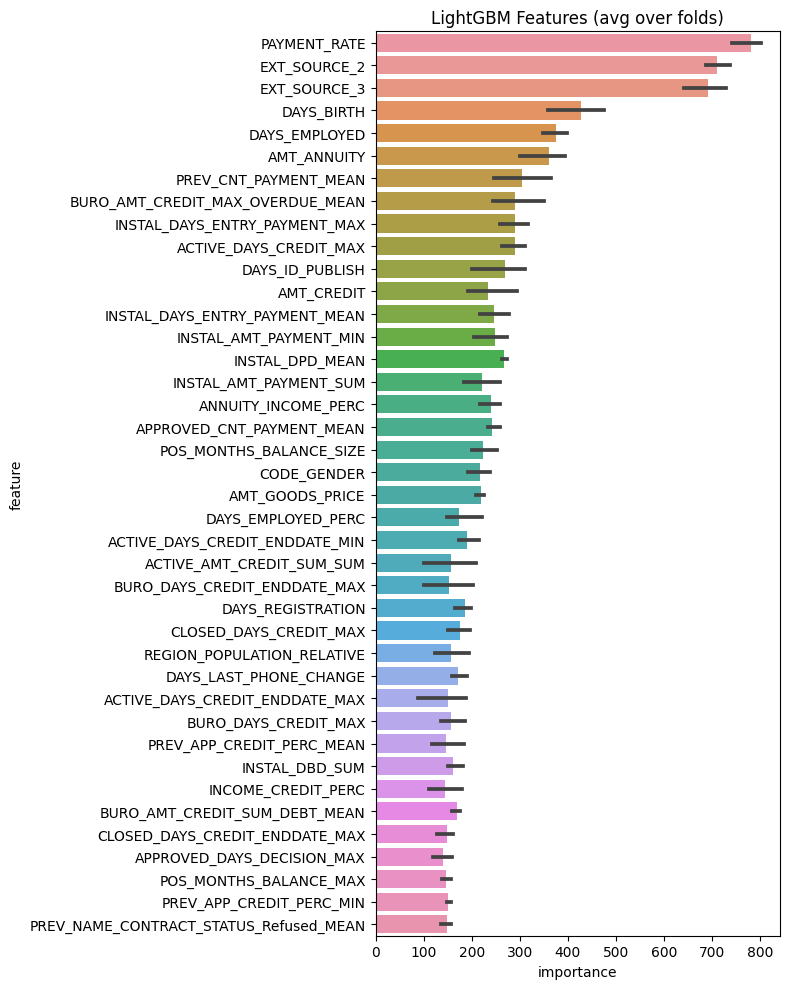

In [37]:
from mlflow.tracking import MlflowClient
name="LightGBM with no class_weight"
description="LightGBM model trained with no class_weight, using 3-fold cross-validation."


mlflow.set_tracking_uri("http://127.0.0.1:5000")
mlflow.end_run()
with mlflow.start_run(run_name=name):
    # Add experiment name and tags
    mlflow.set_tag("developer", "Elise")
    mlflow.set_tag("experiment", "LightGBM_kfold_3")
    
    feat_importance = kfold_lightgbm(df, num_folds= 3, stratified= False, debug= 'debug')
    
    model_uri = f"runs:/{mlflow.active_run().info.run_id}/model"
    model_version = mlflow.register_model(model_uri, name)
    client = MlflowClient()
    
    client.update_model_version(
        name=name,
        version=model_version.version,
        description=description
    )

In [7]:
ttt=df[df['TARGET'].notnull()]
ttt.value_counts('TARGET')

TARGET
0.0    282682
1.0     24825
dtype: int64